<a href="https://colab.research.google.com/github/GiselyKCosta/Desenvolve_Mini_Projeto_-Data_Driven_Insights/blob/main/data_driven_insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data-Driven Insights: Análise de Vendas de uma Superstore

## Preâmbulo

Este notebook apresenta uma análise exploratória de dados de uma Superstore Gigante, com o objetivo de fornecer insights acionáveis que auxiliem a empresa a otimizar suas estratégias de vendas e lucratividade. Em um mercado cada vez mais competitivo, compreender o comportamento de produtos, regiões, categorias e segmentos de clientes é crucial para direcionar ou evitar investimentos. Além disso, a análise busca identificar padrões no tempo de envio e nos descontos aplicados, oferecendo uma visão holística das operações.

Através da manipulação, transformação e visualização de dados utilizando as bibliotecas `pandas`, `numpy` e `matplotlib` em Python, este estudo visa desvendar quais fatores impulsionam o sucesso e onde existem oportunidades de melhoria. As descobertas aqui apresentadas podem servir como base para futuras modelagens preditivas de vendas ou lucros, impulsionando a tomada de decisões baseada em dados.

## Tipos de Dados

*  Strings/Texto:
 * `Ship Mode`
 * `Segment`
 *`Country`
 *`State`
 *`Region`
 * `Category`
 * `Sub-Category`
 *`Product Name`


* Inteiros:
 * `Quantity`

* Decimais:
 * `Sales`
 * `Discount`
 * `Profit`

* Datas e Horas: Após a transformação, as colunas `Order Date` e `Ship Date` foram convertidas para este formato. Para que fosse possível realizar operações baseadas em tempo, como calcular a diferença entre datas.

## 📌 Extracão

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [152]:
# Carregamento do dataset
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vS6qXHUAMUZRuukoRDU_s1aEoBm7MZN2diqorGIdg_ZZ38in7TaEKAZCFdR2S9tXokNdNEs_ZIaN1wP/pub?gid=1374957876&single=true&output=csv"
dados_raw = pd.read_csv(url)
dados_raw


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [161]:

# Exclusão das colunas que não serão usadas

dados = dados_raw.drop(['Row ID', 'Order ID', 'Customer ID', 'Customer Name', 'Product ID', 'Postal Code', 'City'], axis=1)

# Visualização das linhas de cada coluna
for col in dados.columns:
    print(col)
    print(dados[col].unique())
    print("-" * 75)


Order Date
['11/8/2016' '6/12/2016' '10/11/2015' ... '6/3/2016' '4/12/2015'
 '1/21/2014']


AttributeError: 'Series' object has no attribute 'type'

#🔧 Transformação

In [144]:
# Verificar se existe N/a
dados.isna().sum()

,0
Order Date,0
Ship Date,0
Ship Mode,0
Segment,0
Country,0
State,0
Region,0
Category,0
Sub-Category,0
Product Name,0


In [154]:
# Converter colunas de datas para "datetime"
dados['Order Date'] = pd.to_datetime(dados['Order Date'], format= '%m/%d/%Y')
dados['Ship Date'] = pd.to_datetime(dados['Ship Date'], format= '%m/%d/%Y')
dados

,Order Date,Ship Date,Ship Mode,Segment,Country,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,2016-11-08,2016-11-11,Second Class,Consumer,United States,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2016-11-08,2016-11-11,Second Class,Consumer,United States,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,2016-06-12,2016-06-16,Second Class,Corporate,United States,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,2015-10-11,2015-10-18,Standard Class,Consumer,United States,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,2015-10-11,2015-10-18,Standard Class,Consumer,United States,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,2014-01-21,2014-01-23,Second Class,Consumer,United States,Florida,South,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,2017-02-26,2017-03-03,Standard Class,Consumer,United States,California,West,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,2017-02-26,2017-03-03,Standard Class,Consumer,United States,California,West,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,2017-02-26,2017-03-03,Standard Class,Consumer,United States,California,West,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [155]:
#Calcular diferença entre dias
dados['Shipping_time'] = (dados['Ship Date'] - dados['Order Date']).dt.days
dados

,Order Date,Ship Date,Ship Mode,Segment,Country,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping_time
0,2016-11-08,2016-11-11,Second Class,Consumer,United States,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3
1,2016-11-08,2016-11-11,Second Class,Consumer,United States,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3
2,2016-06-12,2016-06-16,Second Class,Corporate,United States,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4
3,2015-10-11,2015-10-18,Standard Class,Consumer,United States,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7
4,2015-10-11,2015-10-18,Standard Class,Consumer,United States,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,2014-01-21,2014-01-23,Second Class,Consumer,United States,Florida,South,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,2
9990,2017-02-26,2017-03-03,Standard Class,Consumer,United States,California,West,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,5
9991,2017-02-26,2017-03-03,Standard Class,Consumer,United States,California,West,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,5
9992,2017-02-26,2017-03-03,Standard Class,Consumer,United States,California,West,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,5


#📊 Carga e análise

## Qual região da mais lucro?

In [132]:
# Tabela
profit_regions = dados.groupby('Region')['Profit'].describe()
profit_regions

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Central,2323.0,17.092709,291.487465,-3701.8928,-5.6643,5.1840,22.456200,8399.9760
East,2848.0,32.135808,251.605084,-6599.9780,1.5579,8.1717,28.718550,5039.9856
South,1620.0,28.857673,212.893088,-3839.9904,1.9471,9.0720,34.233925,3177.4750
West,3203.0,33.849032,174.109081,-3399.9800,3.8520,11.1664,33.000400,6719.9808


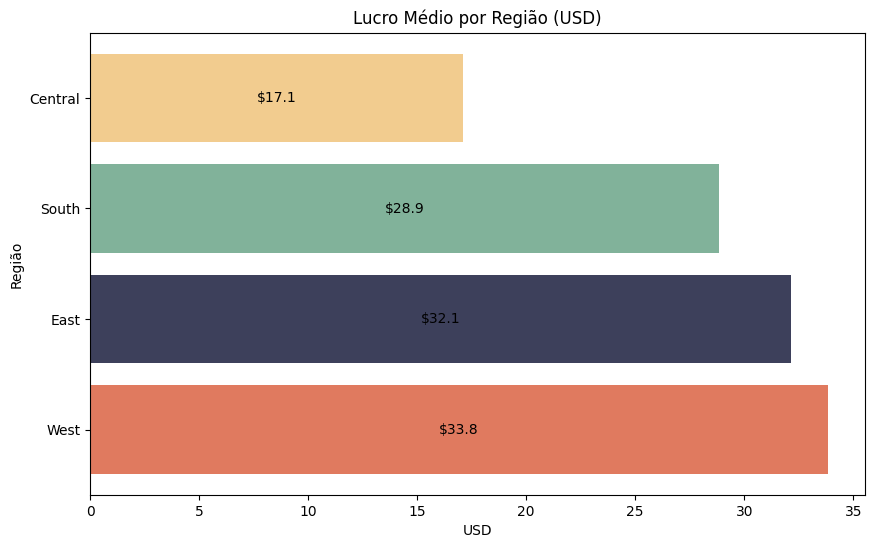

In [133]:
# plot#

# organizar os dados do maior pro menor
profit_regions = profit_regions.sort_values(by='mean', ascending=False)


# Seleçao dos dados
medias = profit_regions['mean']
regioes = profit_regions.index

#Definir cores - Paleta coolors
cores = ['#e07a5f', '#3d405b', '#81b29a', '#f2cc8f']


plt.figure(figsize=(10, 6))
plt.barh(regioes, medias, color=cores)
#  plotar as barras uma a uma
for i, media in enumerate(medias):
  plt.text (media / 2, i, f"${media:.1f}", ha='center', va='center', color='black')

# Legendas
plt.xlabel('USD')
plt.ylabel('Região')
plt.title('Lucro Médio por Região (USD)')


plt.show()



## Qual categoria apresenta mais o lucro?

In [134]:

#Separar o dataset por região
central = dados[dados['Region'] == 'Central']
east = dados[dados['Region'] == 'East']
south = dados[dados['Region'] == 'South']
west = dados[dados['Region'] == 'West']

# Sumário do lucro por categoria
# central
profit_category_central = central.groupby('Category')['Profit'].describe()
profit_category_central



,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
Furniture,481.0,-5.968918,139.952020,-566.5625,-41.262000,-8.5794,14.8491,770.352
Office Supplies,1422.0,6.244712,269.520216,-3701.8928,-1.934400,4.9224,15.2398,4946.370
Technology,420.0,80.231981,443.909891,-1359.9920,6.255375,24.9866,64.7865,8399.976


In [135]:
# east
profit_category_east = east.groupby('Category')['Profit'].describe()
profit_category_east

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
Furniture,601.0,5.068496,141.821824,-1665.0522,-13.756800,8.0406,30.0980,1013.1270
Office Supplies,1712.0,23.957114,105.995426,-1049.3406,2.215125,7.1811,19.6416,1453.1238
Technology,535.0,88.714084,524.084817,-6599.9780,-0.772350,19.9746,88.2231,5039.9856


In [136]:
# central
profit_category_south = south.groupby('Category')['Profit'].describe()
profit_category_south


,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
Furniture,332.0,20.395199,178.304669,-1862.3124,2.4583,12.1566,52.840275,746.4078
Office Supplies,995.0,20.086827,156.440304,-1306.5504,1.4456,6.3960,18.829800,3177.4750
Technology,293.0,68.231506,360.621959,-3839.9904,7.1988,26.7904,86.392800,2799.9840


In [137]:
# west
profit_category_west = west.groupby('Category')['Profit'].describe()
profit_category_west

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
Furniture,707.0,16.272914,99.926279,-814.4832,2.2026,11.9952,35.71980,629.0100
Office Supplies,1897.0,27.733183,93.640005,-694.2936,3.6156,9.0000,22.94880,1906.4850
Technology,599.0,73.962687,347.320239,-3399.9800,8.9970,26.9985,66.63475,6719.9808


In [ ]:
central

In [138]:
# Unir as médias da regiões em um só df
media_profit_por_categoria = pd.DataFrame({
    "Central": central.groupby("Category")["Profit"].mean(),
    "East": east.groupby("Category")["Profit"].mean(),
    "South": south.groupby("Category")["Profit"].mean(),
    "West": west.groupby("Category")["Profit"].mean(),
})
media_profit_por_categoria

,Central,East,South,West
Category,,,,
Furniture,-5.968918,5.068496,20.395199,16.272914
Office Supplies,6.244712,23.957114,20.086827,27.733183
Technology,80.231981,88.714084,68.231506,73.962687


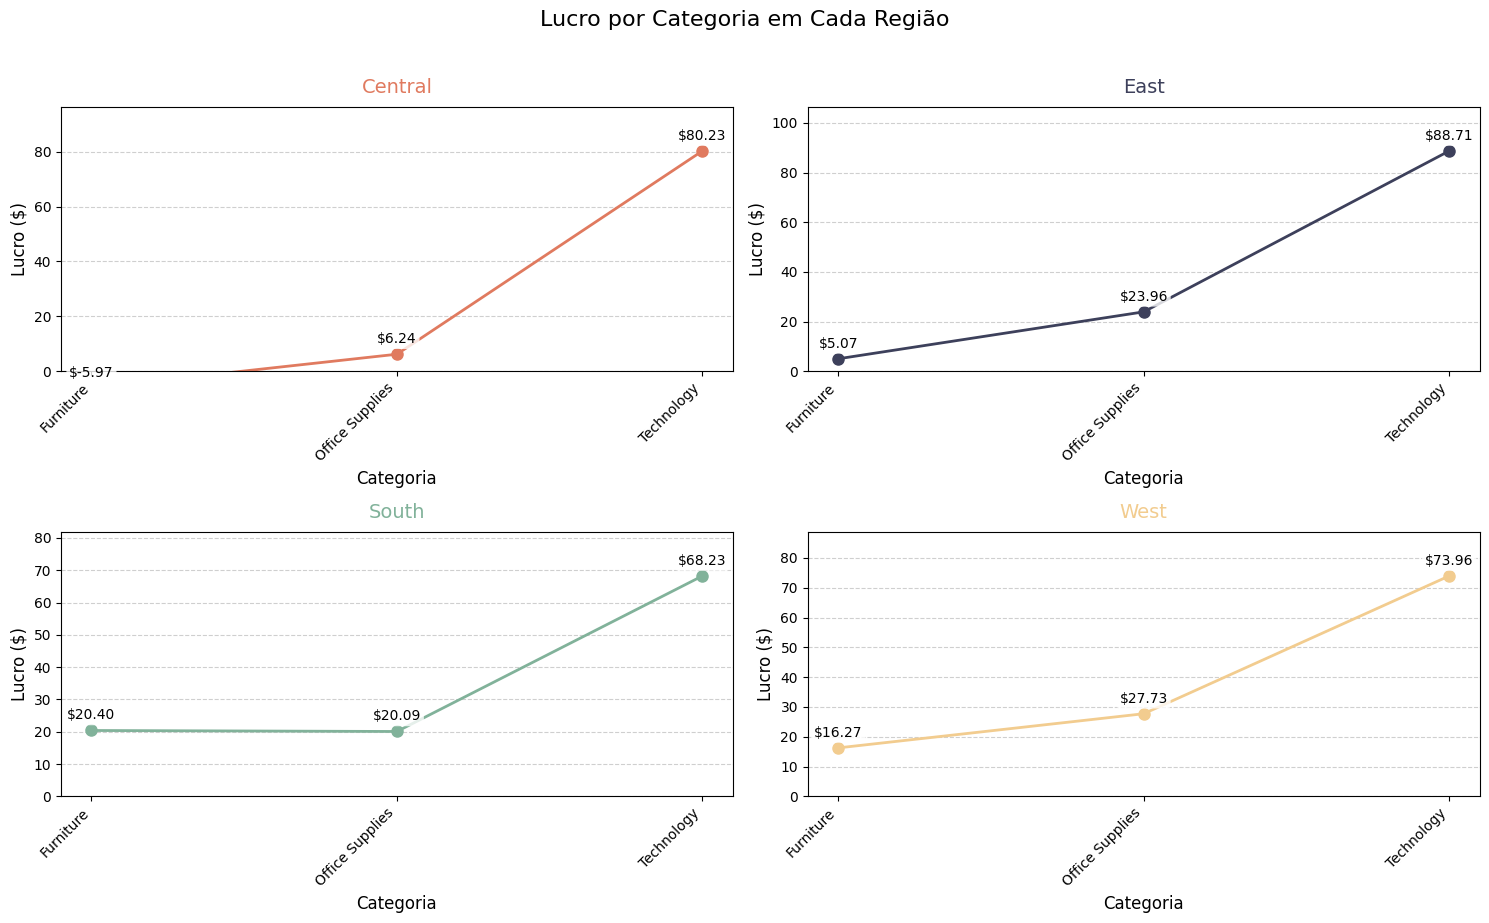

In [139]:
#Plot

categorias = media_profit_por_categoria.index
regioes = media_profit_por_categoria.columns
cores = ['#e07a5f', '#3d405b', '#81b29a', '#f2cc8f']


fig, axes = plt.subplots(2, 2, figsize=(15, 9))
fig.suptitle('Lucro por Categoria em Cada Região', fontsize=16, y=1.02)

plt.subplots_adjust(hspace=0.3, wspace=0.2)


for i, (ax, regioes) in enumerate(zip(axes.flatten(), regioes)):

    dados = media_profit_por_categoria[regioes]


    ax.plot(
        categorias,
        dados,
        marker='o',
        markersize=8,
        linewidth=2,
        color=cores[i],
        label=regioes
    )


    ax.set_title(regioes, fontsize=14, pad=10, color=cores[i])
    ax.set_xlabel('Categoria', fontsize=12)
    ax.set_ylabel('Lucro ($)', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.6)

    for j, (categoria, valor) in enumerate(zip(categorias, dados)):
        ax.text(
            j,
            valor + (0.05 * dados.max()),
            f'${valor:.2f}',
            ha='center',
            fontsize=10,
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.2')
        )


    ax.set_ylim(0, dados.max() * 1.2)
    ax.set_xticks(range(len(categorias)))
    ax.set_xticklabels(categorias, rotation=45, ha='right')


for j in range(i+1, len(axes.flatten())):
    axes.flatten()[j].axis('off')

plt.tight_layout()
plt.show()

## Qual região com maior tempo entre a compra e o envio?

In [147]:
# Unir as médias da regiões em um só df
media_envio_por_regiao =  dados.groupby('Region')['Shipping_time'].describe()
media_envio_por_regiao

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Central,2323.0,4.058115,1.688635,0.0,3.0,4.0,5.0,7.0
East,2848.0,3.908708,1.728728,0.0,3.0,4.0,5.0,7.0
South,1620.0,3.958025,1.737418,0.0,3.0,4.0,5.0,7.0
West,3203.0,3.929753,1.808198,0.0,3.0,4.0,5.0,7.0


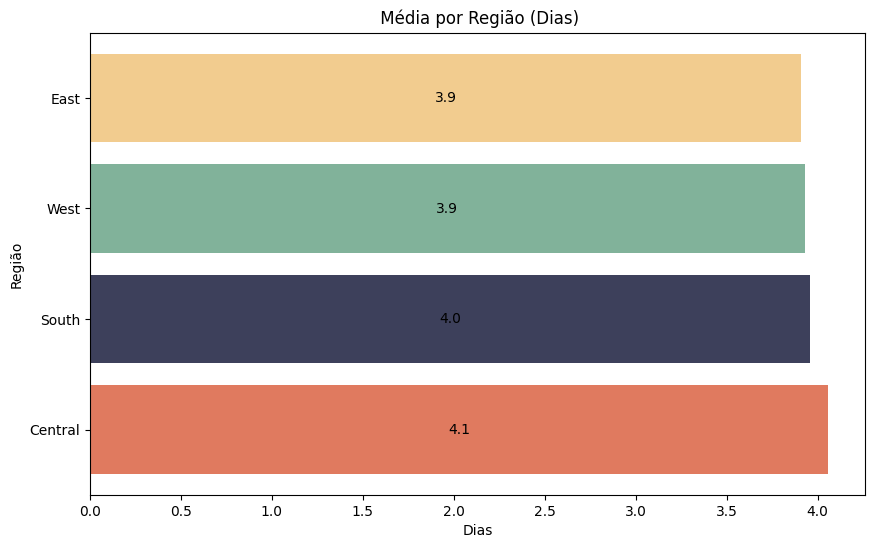

In [148]:
# plot#

# organizar os dados do maior pro menor
media_envio_por_regiao = media_envio_por_regiao.sort_values(by='mean', ascending=False)


# Seleçao dos dados
medias = media_envio_por_regiao['mean']
regioes = media_envio_por_regiao.index

#Definir cores - Paleta coolors
cores = ['#e07a5f', '#3d405b', '#81b29a', '#f2cc8f']


plt.figure(figsize=(10, 6))
plt.barh(regioes, medias, color=cores)
#  plotar as barras uma a uma
for i, media in enumerate(medias):
  plt.text (media / 2, i, f"{media:.1f}", ha='center', va='center', color='black')

# Legendas
plt.xlabel('Dias')
plt.ylabel('Região')
plt.title(' Média por Região (Dias)')


plt.show()


In [149]:
# Unir as médias da categoria em um só df
media_envio_por_categoria = pd.DataFrame({
    "Central": central.groupby("Category")["Shipping_time"].mean(),
    "East": east.groupby("Category")["Shipping_time"].mean(),
    "South": south.groupby("Category")["Shipping_time"].mean(),
    "West": west.groupby("Category")["Shipping_time"].mean(),
})
media_envio_por_categoria

,Central,East,South,West
Category,,,,
Furniture,3.979210,3.850250,4.024096,3.881188
Office Supplies,4.120253,3.937500,3.955779,3.936742
Technology,3.938095,3.882243,3.890785,3.964942


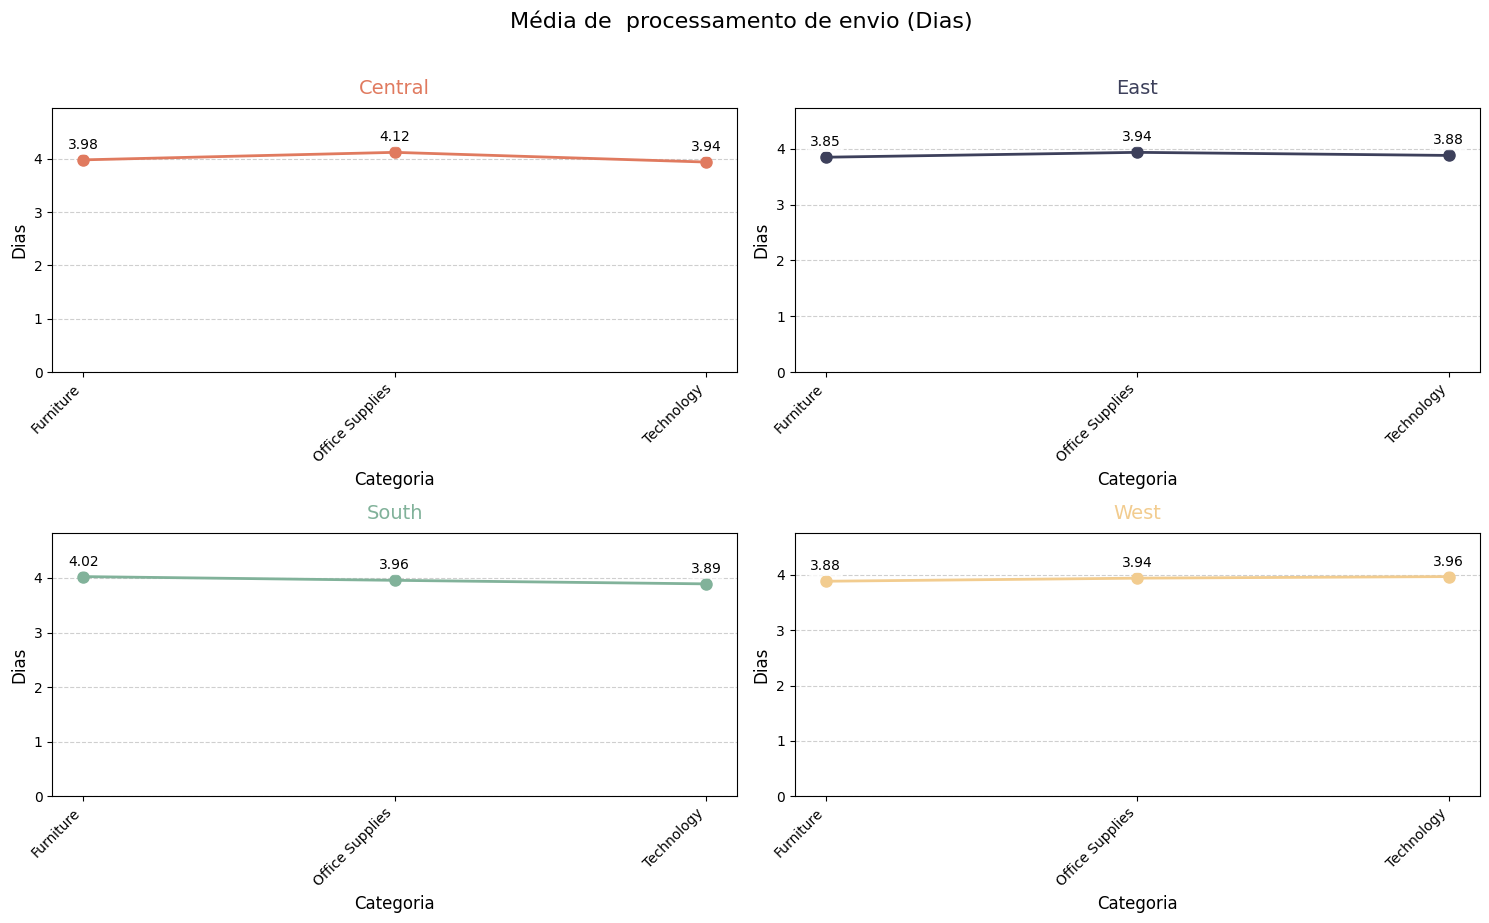

In [150]:
#Plot

categorias = media_envio_por_categoria.index
regioes = media_envio_por_categoria.columns
cores = ['#e07a5f', '#3d405b', '#81b29a', '#f2cc8f']


fig, axes = plt.subplots(2, 2, figsize=(15, 9))
fig.suptitle('Média de  processamento de envio (Dias) ', fontsize=16, y=1.02)

plt.subplots_adjust(hspace=0.3, wspace=0.2)


for i, (ax, regioes) in enumerate(zip(axes.flatten(), regioes)):

    dados = media_envio_por_categoria[regioes]


    ax.plot(
        categorias,
        dados,
        marker='o',
        markersize=8,
        linewidth=2,
        color=cores[i],
        label=regioes
    )


    ax.set_title(regioes, fontsize=14, pad=10, color=cores[i])
    ax.set_xlabel('Categoria', fontsize=12)
    ax.set_ylabel('Dias', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.6)

    for j, (categoria, valor) in enumerate(zip(categorias, dados)):
        ax.text(
            j,
            valor + (0.05 * dados.max()),
            f'{valor:.2f}',
            ha='center',
            fontsize=10,
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.2')
        )


    ax.set_ylim(0, dados.max() * 1.2)
    ax.set_xticks(range(len(categorias)))
    ax.set_xticklabels(categorias, rotation=45, ha='right')


for j in range(i+1, len(axes.flatten())):
    axes.flatten()[j].axis('off')

plt.tight_layout()
plt.show()

## Qual região tem mais descontos?

In [156]:
# Unir as médias da regiões em um só df
media_desconto_por_regiao =  dados.groupby('Region')['Discount'].describe()
media_desconto_por_regiao

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Central,2323.0,0.240353,0.265433,0.0,0.0,0.2,0.3,0.8
East,2848.0,0.145365,0.193155,0.0,0.0,0.0,0.2,0.7
South,1620.0,0.147253,0.197420,0.0,0.0,0.2,0.2,0.7
West,3203.0,0.109335,0.146861,0.0,0.0,0.0,0.2,0.7


In [157]:
# Unir as médias da categoria em um só df
media_desconto_por_categoria = pd.DataFrame({
    "Central": central.groupby("Category")["Discount"].mean(),
    "East": east.groupby("Category")["Discount"].mean(),
    "South": south.groupby("Category")["Discount"].mean(),
    "West": west.groupby("Category")["Discount"].mean(),
})
media_desconto_por_categoria

,Central,East,South,West
Category,,,,
Furniture,0.297380,0.154077,0.121536,0.131400
Office Supplies,0.252743,0.142932,0.167437,0.093358
Technology,0.133095,0.143364,0.107850,0.133890


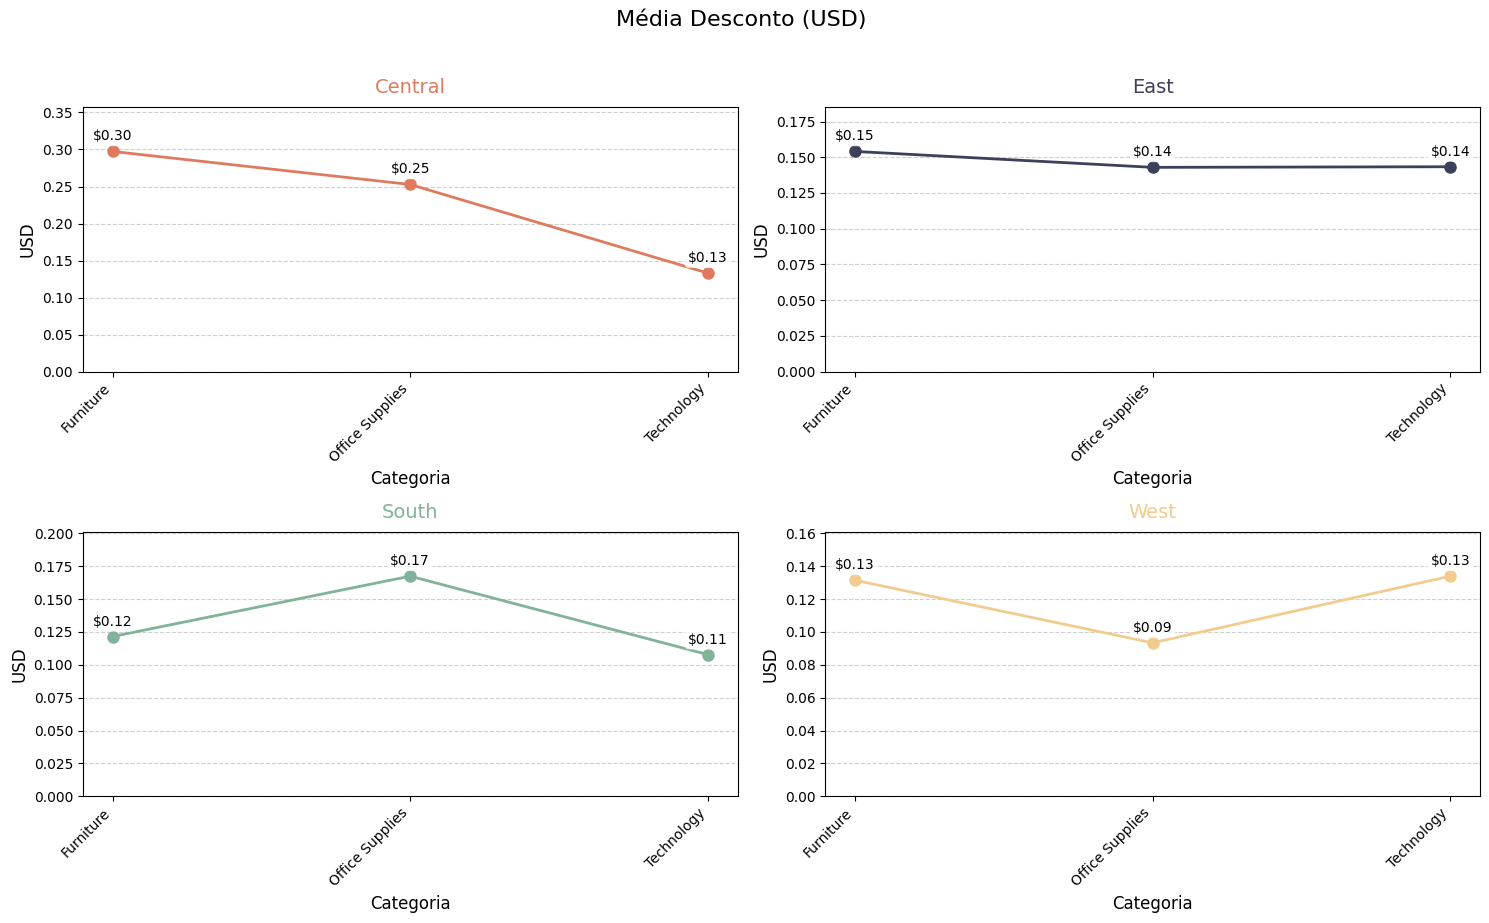

In [159]:
#Plot

categorias = media_desconto_por_categoria.index
regioes = media_desconto_por_categoria.columns
cores = ['#e07a5f', '#3d405b', '#81b29a', '#f2cc8f']


fig, axes = plt.subplots(2, 2, figsize=(15, 9))
fig.suptitle('Média Desconto (Per) ', fontsize=16, y=1.02)

plt.subplots_adjust(hspace=0.3, wspace=0.2)


for i, (ax, regioes) in enumerate(zip(axes.flatten(), regioes)):

    dados = media_desconto_por_categoria[regioes]


    ax.plot(
        categorias,
        dados,
        marker='o',
        markersize=8,
        linewidth=2,
        color=cores[i],
        label=regioes
    )


    ax.set_title(regioes, fontsize=14, pad=10, color=cores[i])
    ax.set_xlabel('Categoria', fontsize=12)
    ax.set_ylabel('Percent', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.6)

    for j, (categoria, valor) in enumerate(zip(categorias, dados)):
        ax.text(
            j,
            valor + (0.05 * dados.max()),
            f'${valor:.2f}',
            ha='center',
            fontsize=10,
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.2')
        )


    ax.set_ylim(0, dados.max() * 1.2)
    ax.set_xticks(range(len(categorias)))
    ax.set_xticklabels(categorias, rotation=45, ha='right')


for j in range(i+1, len(axes.flatten())):
    axes.flatten()[j].axis('off')

plt.tight_layout()
plt.show()

## Relatório Final: Principais Insights e Descobertas

Esta análise exploratória dos dados da Superstore revelou padrões significativos em relação a lucro, tempo de envio e descontos, segmentados por região e categoria de produtos.

### Lucratividade por Região e Categoria

* A análise do lucro médio por região destaca que:

* **Região Oeste** é a mais lucrativa, com um lucro médio de $33.85.
* **Região Leste** e a **Região Sul** apresentam lucros médios intermediários, \$32.14 e \$28.86, respectivamente.
* A **Região Central** exibe o lucro médio mais baixo, de apenas \$17.09.

Ao aprofundar a análise de lucratividade por categoria em cada região:

* **Tecnologia** é a categoria mais lucrativa em todas as regiões. O maior lucro médio para tecnologia é observado na Região Leste (\$88.71).
* A categoria de **Mobilia** é a de menor desempenho, com a Região Central registrando um prejuízo médio de -\$5.97. As outras regiões obtiveram lucro com mobilias.

> **Recomendações:** A empresa deve focar em expandir as vendas de produtos de **Tecnologia** em todas as regiões, dada a sua alta rentabilidade. Para **Mobilibia**, especialmente na Região Central, é crucial revisar as estratégias de precificação, desconto ou custos para reverter o prejuízo.

### Tempo de Processamento de Envio por Região e Categoria

A média do tempo de envio (dias entre a data do pedido e a data de envio) é bastante consistente entre as regiões, variando pouco:

* A **Região Central** tem o tempo de envio médio ligeiramente maior, com 4.06 dias.

Analisando o tempo de envio por categoria e região[cite: 1]:

* Para **Artigos de Escritório**, a Região Central possui o maior tempo médio de envio (4.12 dias), enquanto a Região Oeste é a mais rápida (3.94 dias)

> **Recomendações:** Embora as diferenças sejam pequenas, a Superstore pode investigar os processos logísticos na Região Central para a categoria de Artigos de Escritório, buscando identificar gargalos que possam estar causando um tempo de envio marginalmente maior.

### Descontos por Região e Categoria

A análise dos descontos médios aplicados revela uma disparidade significativa entre as regiões:

* A **Região Central** aplica os maiores descontos médios (0.24 ou 24%), o que pode contribuir para seu menor lucro médio geral.

* A **Região Oeste**, a mais lucrativa, apresenta o menor desconto médio (0.11 ou 11%).

Detalhando os descontos por categoria e região:

* A categoria **Mobilibia** recebe os maiores descontos na Região Central (0.297 ou 29.7%), o que corrobora o prejuízo nessa categoria e região.
* Os descontos em **Artigos de Escritório** também são altos na Região Central (0.252 ou 25.2%).


> **Recomendações:** A política de descontos na **Região Central** deve ser urgentemente revisada, especialmente para a categoria de Mobilia. Reduzir os descontos excessivos pode ser uma alavanca para melhorar a lucratividade nesta região. A estratégia da Região Oeste de manter descontos mais baixos pode servir de benchmark para outras regiões.

### Conclusão Geral

A Superstore deve concentrar seus esforços em maximizar a rentabilidade dos produtos de Tecnologia, que são consistentemente lucrativos. Uma atenção especial deve ser dada à Região Central, não apenas para reverter o prejuízo em Mobilias, mas também para otimizar as políticas de desconto em todas as categorias, buscando um equilíbrio entre volume de vendas e margem de lucro.